# Support Vector Machine: Supervised Learning Method

Die Support Vector Machine ist ein Classifier, der in der Lage ist, neue, unbekannte Datenpunkte zu predicten, anhand der bereits bekannten und gelabelten Daten. 
Ziel des Support Vector Machines ist es, den ungelabelte Datenpunkt korrekt zuzuordnen, das tut er mit einem geeigneten Datasplit.

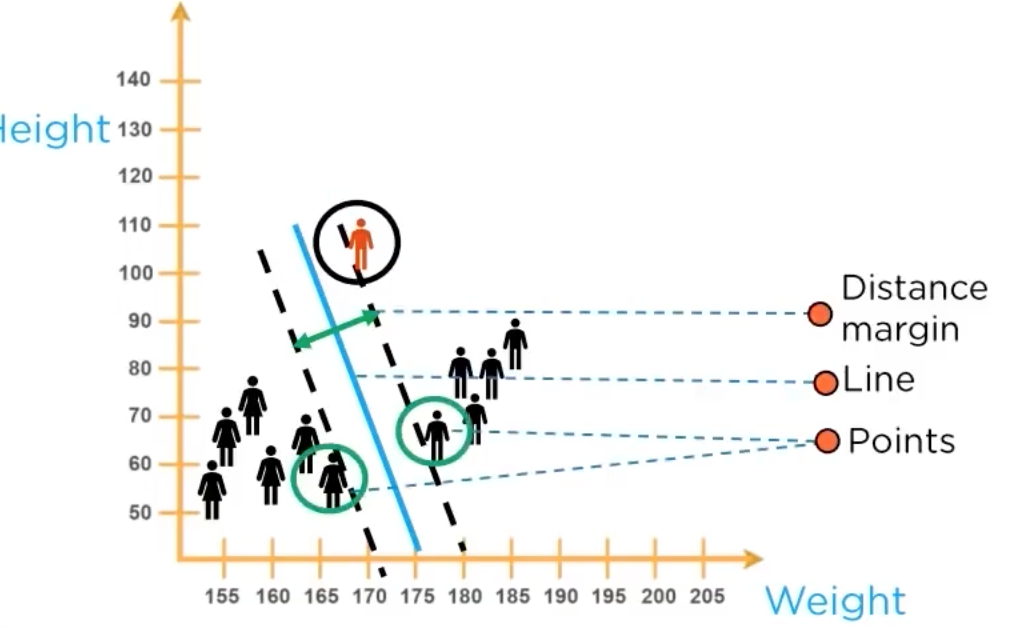

In [4]:
from IPython.display import Image
Image(filename = 'supovec.png')

Der Support Vector Line (schwarz gestrichelt) und der Hyperplane (Blaue Linie), sollten so weit wie möglich voneinander entfernt sein = maximum Distance Margin.

# Beispiel: Blobs unterscheiden

In [6]:
import numpy as np, matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs #zufallsdaten

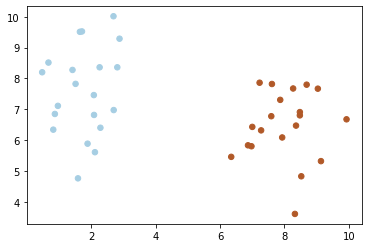

In [45]:
#40 blobs mit 2 kernen
X, y = make_blobs(n_samples = 40, centers = 2, random_state = 20)
clf = svm.SVC(kernel = 'linear', C = 1000)
clf.fit(X,y)
#kern/center 1 und center 2, numpy schreibweise(arrays)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap=plt.cm.Paired)
#plt.show()

In [29]:
#unbekannte Datenpunkte einfügen und predicten lassen
newby = [[3,4],[5,6]]
clf.predict(newby) #ergibt einen array aus dem typen 0 und 1

array([0, 1])

# Model trainieren und plotten

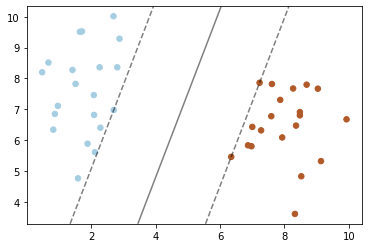

In [44]:
clf = svm.SVC(kernel = 'linear', C = 1000)
clf.fit(X,y)
#kern/center 1 und center 2, numpy schreibweise(arrays)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap=plt.cm.Paired)

#ax sieht sich die alte grafik an, xlimit und ylimit sieht sich die abstände an
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#grid erstellen mit 30 punkten und gleichen abständen (linspace)
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)

#achsen flatten mit ravel, reshapen damit es auf die linien passt
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape) #bereits trainierter svm wird reshaped

#plot decision boundary&abstände visuel erstellen
ax.contour(XX, YY, Z, colors = 'k', levels = [-1,0,1], alpha = 0.5, linestyles = ['--','-','--'])
#plot support vector
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:,1], s = 100, linewidth = 1, facecolors = 'none')
plt.show()

# Beispiel ohne Zufallsdaten: Bankdata

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
bank = pd.read_csv("./data/bill_authentication.csv")

In [51]:
#explore data
bank.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [52]:
bank.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [54]:
bank.shape

(1372, 5)

In [57]:
#preprocessing data
X = bank.drop('Class', axis=1) #drop class, diese wird nachher predicted
y = bank['Class']

In [58]:
#traintestsplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [59]:
#training
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [61]:
y_pred = svclassifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

# Model evaluieren

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[152   1]
 [  1 121]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.99      0.99      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

